In [36]:
import matplotlib.pyplot as plt
import time

In [410]:
timelist1,timelist2,timelist3 = [],[],[]
cap = 72000

In [411]:
class HashTableChain:
    def __init__(self, size=59000, file=None):
        self.size = size
        self.table = [None] * size
        self.g = 31  # positive constant
        with open(file,'r') as f:
          t1 = time.perf_counter()
          for line in f.readlines():
            word = line.split('\n')[0]
            self.insert(word, 1)
            timelist1.append(time.perf_counter() - t1)
        self.print_contents()

    
    # hash function to determine the index for a given key
    def hash_function(self, key):
      hash = 0
      n = len(key) # s is the given word
      for i in range(n):
        hash += self.g * hash + ord(key[i])     # g is the positive constant chosen by you
      index = hash % self.size     # capacity is total memory size allocated for hash table
      return index
    
    # insert a key-value pair to the hash table
    def insert(self, key, value):
      index = self.hash_function(key)
      if not self.table[index]:
        self.table[index] = []
        self.table[index].append([key, value])
        return
      for ele in self.table[index]:
        if ele[0] == key:
          ele[1]+=value
          return
      self.table[index].append([key, value])
      

    # retrieve the value for a given key
    def search(self, key):
      index = self.hash_function(key)
      if not self.table[index]:
        return None               # Or should we return -1?
      for ele in self.table[index]:
        if ele[0] == key:
          return ele
    
    def delete(self, key):
      index = self.hash_function(key)
      if not self.table[index]:
        return None
      for ele in self.table[index]:
        if ele[0] == key:
          self.table[index].remove(ele)
    
    def print_contents(self):
      # Print the contents of the hash table to a file
      with open("Chaining.txt", "w") as f:
        for chain in self.table:
          if chain is not None:
            for word, count in chain:
              f.write(f"{word} {count}\n")

In [412]:
htc = HashTableChain(size=cap, file='./dictionary_cpy.txt')
# htc.insert('apple', 1)
# htc.insert('mango', 1)
# htc.insert('appmd', 1)
# htc.insert('apple', 1)
# htc.insert('appnd', 1)
# htc.insert('appzd', 1)
# htc.insert('appzd', 1)
# htc.insert('donkey', 1)
# htc.insert('donkey', 1)
# print(htc.table)
# htc.delete('donkey')
print(len(htc.table))

72000


In [413]:
class HashTableLinProb:
    def __init__(self, size=69000, file=None):
        self.size = size
        self.table = [None] * size
        self.g = 31  # positive constant
        with open(file,'r') as f:
          t1 = time.perf_counter()
          for line in f.readlines():
            word = line.split('\n')[0]
            self.insert(word, 1)
            timelist2.append(time.perf_counter() - t1)
        self.print_contents()
    
    # hash function to determine the index for a given key
    def hash_function(self, key):
      hash = 0
      n = len(key) # s is the given word
      for i in range(n):
        hash += self.g * hash + ord(key[i])     # g is the positive constant chosen by you
      index = hash % self.size     # capacity is total memory size allocated for hash table
      return index
    
    # insert a key-value pair to the hash table
    def insert(self, key, value):
      index = self.hash_function(key)
      count = 0
      while True:
        if not self.table[index]:
          self.table[index] = [key, value]
          return
        if self.table[index][0] == key:
          self.table[index][1]+=value
          return
        index = (index+1)%self.size
        if count == self.size:
          return
        count+=1

    # retrieve the value for a given key
    def search(self, key):
      index = self.hash_function(key)
      count = 0
      while True:
        if self.table[index][0] == key:
          return self.table[index]
        index = (index+1)%self.size
        if count == self.size:
          return
        count+=1
    
    def delete(self, key):
      index = self.hash_function(key)
      count = 0
      while True:
        if self.table[index][0] == key:
          self.table[index] = None
          return
        index = (index+1)%self.size
        if count == self.size:
          return
        count+=1
    
    def print_contents(self):
      # Print the contents of the hash table to a file
      with open("Probing.txt", "w") as f:
        for ele in self.table:
          if ele:
            word,count = ele
            f.write(f"{word} {count}\n")



In [414]:
htp = HashTableLinProb(size=cap, file='./dictionary_cpy.txt')
# htp.insert('apple', 1)
# htp.insert('mango', 1)
# htp.insert('appmd', 1)
# htp.insert('apple', 1)
# htp.insert('appnd', 1)
# htp.insert('donkey', 1)
print(len(htp.table))

72000


In [415]:
class HashTableChainDouble:
    def __init__(self, size=69000, file=None):
        self.size = size
        self.table = [None] * size
        self.g = 31  # positive constant
        with open(file,'r') as f:
          t1 = time.perf_counter()
          for line in f.readlines():
            word = line.split('\n')[0]
            self.insert(word, 1)
            timelist3.append(time.perf_counter() - t1)
        self.print_contents()
    
    # hash function to determine the index for a given key
    def hash_function(self, key):
        hash = 0
        n = len(key) # s is the given word
        for i in range(n):
            hash += self.g * hash + ord(key[i])     # g is the positive constant chosen by you
        index = hash % self.size     # capacity is total memory size allocated for hash table
        return index

    def secondary_hash_function(self, key):
        k = len(key)%(self.size-1)
        return k
    
    # insert a key-value pair to the hash table
    def insert(self, key, value):
      i1 = self.hash_function(key)
      index = self.hash_function(key)
      count = 1
      while True:
        if not self.table[index]:
          self.table[index] = [key, value]
          return
        elif self.table[index][0] == key:
          self.table[index][1]+=value
          return
        index = (i1 + count*self.secondary_hash_function(key))%self.size
        count+=1
        if count == self.size:
          return
        

    # retrieve the value for a given key
    def search(self, key):
      i1 = self.hash_function(key)
      index = self.hash_function(key)
      count = 1
      while True:
        if not self.table[index]:
          return
        if self.table[index][0] == key:
          return self.table[index]
        index = (i1 + count*self.secondary_hash_function(key))%self.size
        count+=1
        if count == self.size:
          return
    
    def delete(self, key):
      i1 = self.hash_function(key)
      index = self.hash_function(key)
      count = 1
      while True:
        if not self.table[index]:
          return
        if self.table[index][0] == key:
          self.table[index] = None
          return
        index = (i1 + count*self.secondary_hash_function(key))%self.size
        count+=1
        if count == self.size:
          return
    
    def print_contents(self):
      # Print the contents of the hash table to a file
      with open("DoubleHashing.txt", "w") as f:
        for ele in self.table:
          if ele:
            word,count = ele
            f.write(f"{word} {count}\n")

In [416]:
htd = HashTableChainDouble(size=cap, file='./dictionary_cpy.txt')
# htd = HashTableChainDouble(size=cap, file='./dictionary.txt')
# htp.insert('apple', 1)
# htp.insert('mango', 1)
# htp.insert('appmd', 1)
# htp.insert('apple', 1)
# htp.insert('appnd', 1)
# htp.insert('donkey', 1)
print(htd.search('astronaut'))
print(len(htd.table))

['astronaut', 38]
72000


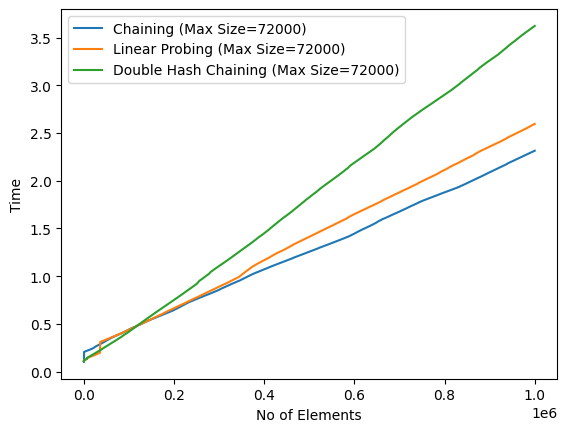

In [417]:
if __name__ == '__main__':
    # fig,axes = plt.subplots(1, 3, figsize=(12,6))
    # axes[0].plot(timelist1)
    # axes[1].plot(timelist2)
    # axes[2].plot(timelist3)
    plt.plot(timelist1, label='Chaining (Max Size='+str(cap)+')')
    plt.plot(timelist2, label='Linear Probing (Max Size='+str(cap)+')')
    plt.plot(timelist3, label='Double Hash Chaining (Max Size='+str(cap)+')')
    plt.xlabel('No of Elements')
    plt.ylabel('Time')
    plt.legend()

In [385]:
l = []
with open('dictionary.txt','r') as f1:
    with open('dictionary_cpy.txt','w') as f2:
        for _ in range(10_00_000):
            line = f1.readline()
            f2.write(line)
            l.append(line)
len(set(l))

58110